In [7]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

In [2]:
function euler(f::Function, t0::Real, y0::Real, dt::Real, num_steps::Integer)
  num_steps > 0 || throw(ArgumentError("The number of steps must be positive."))
  dt > 0 || throw(ArgumentError("The step size dt must be positive."))
  t = LinRange(t0,t0+num_steps*dt,num_steps+1)
  y = zeros(Float64,num_steps+1)
  y[1] = y0
  for i=1:num_steps
    y[i+1] = y[i] + dt*f(t[i],y[i])
  end
  (collect(t),y)
end

euler (generic function with 1 method)

In [3]:
t,y = euler( (t,y) -> y, 0, 1, 0.1, 10)

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [1.0, 1.1, 1.2100000000000002, 1.3310000000000002, 1.4641000000000002, 1.61051, 1.7715610000000002, 1.9487171, 2.1435888100000002, 2.357947691, 2.5937424601])

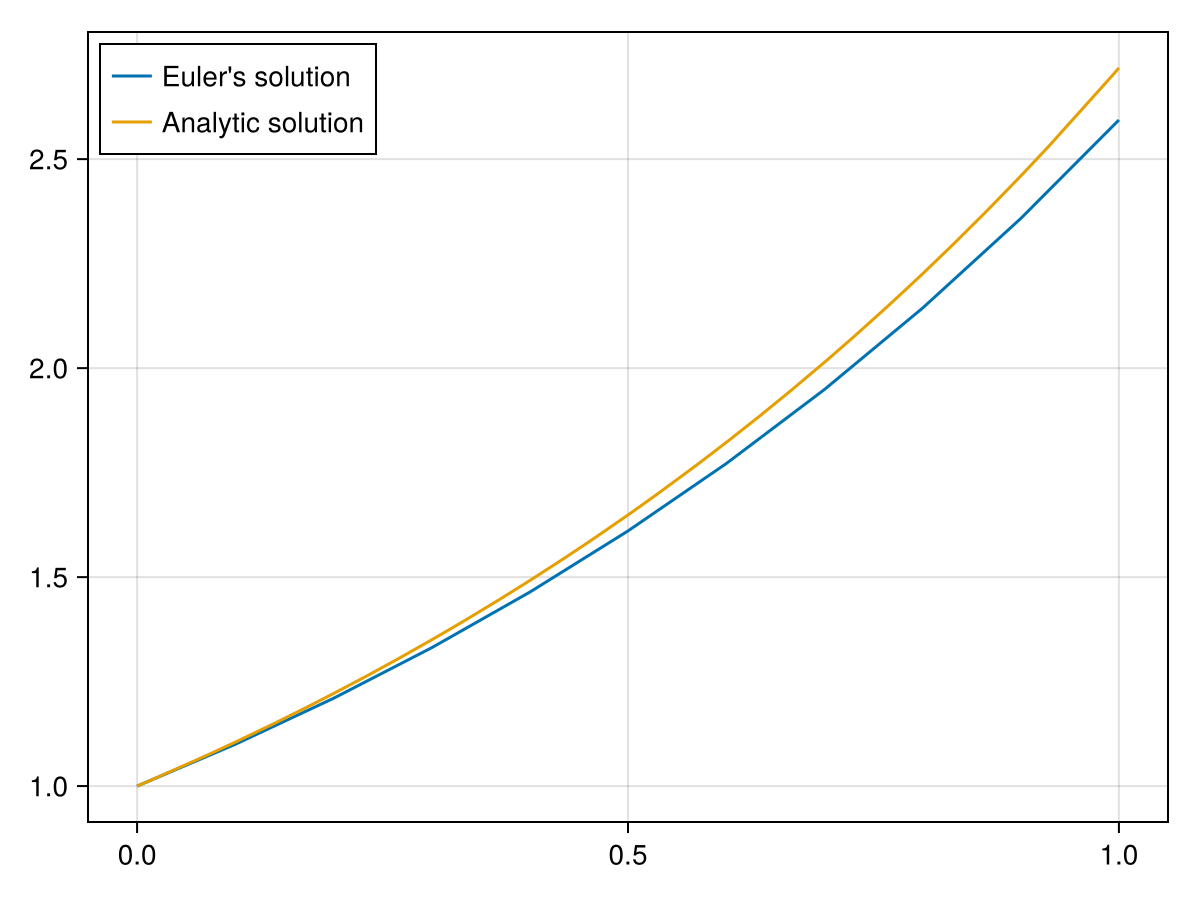

In [9]:
fig, ax = lines(t,y,label="Euler's solution")
lines!(ax, 0..1, exp,label="Analytic solution")
axislegend(ax, position = :lt)
fig

In [10]:
save("../assets/plots/diffeqn/euler.png", fig)

CairoMakie.Screen{IMAGE}


In [11]:
function rk4(f::Function, t0:: Real, y0::Real, dt::Real, num_steps::Integer)
  num_steps > 0 || throw(ArgumentError("The number of steps must be positive."))
  dt > 0 || throw(ArgumentError("The step size dt must be positive."))
  t=LinRange(t0,t0+num_steps*dt,num_steps+1)
  y=zeros(Float64,num_steps+1)
  y[1] = y0
  for i=1:num_steps
    k1 = f(t[i],y[i])
    k2 = f(t[i]+dt/2,y[i]+dt/2*k1)
    k3 = f(t[i]+dt/2,y[i]+dt/2*k2)
    k4 = f(t[i]+dt,y[i]+dt*k3)
    y[i+1] = y[i] + dt/6*(k1+2k2+2k3+k4)
  end
  (t,y)
end

rk4 (generic function with 1 method)

In [12]:
t,y = rk4((t,y) -> y, 0, 1, 0.1, 10)

(LinRange{Float64}(0.0, 1.0, 11), [1.0, 1.1051708333333332, 1.2214025708506944, 1.3498584970625376, 1.4918242400806856, 1.648720638596838, 1.822117962091933, 2.0137516265967768, 2.2255395632923154, 2.459601413780071, 2.718279744135166])

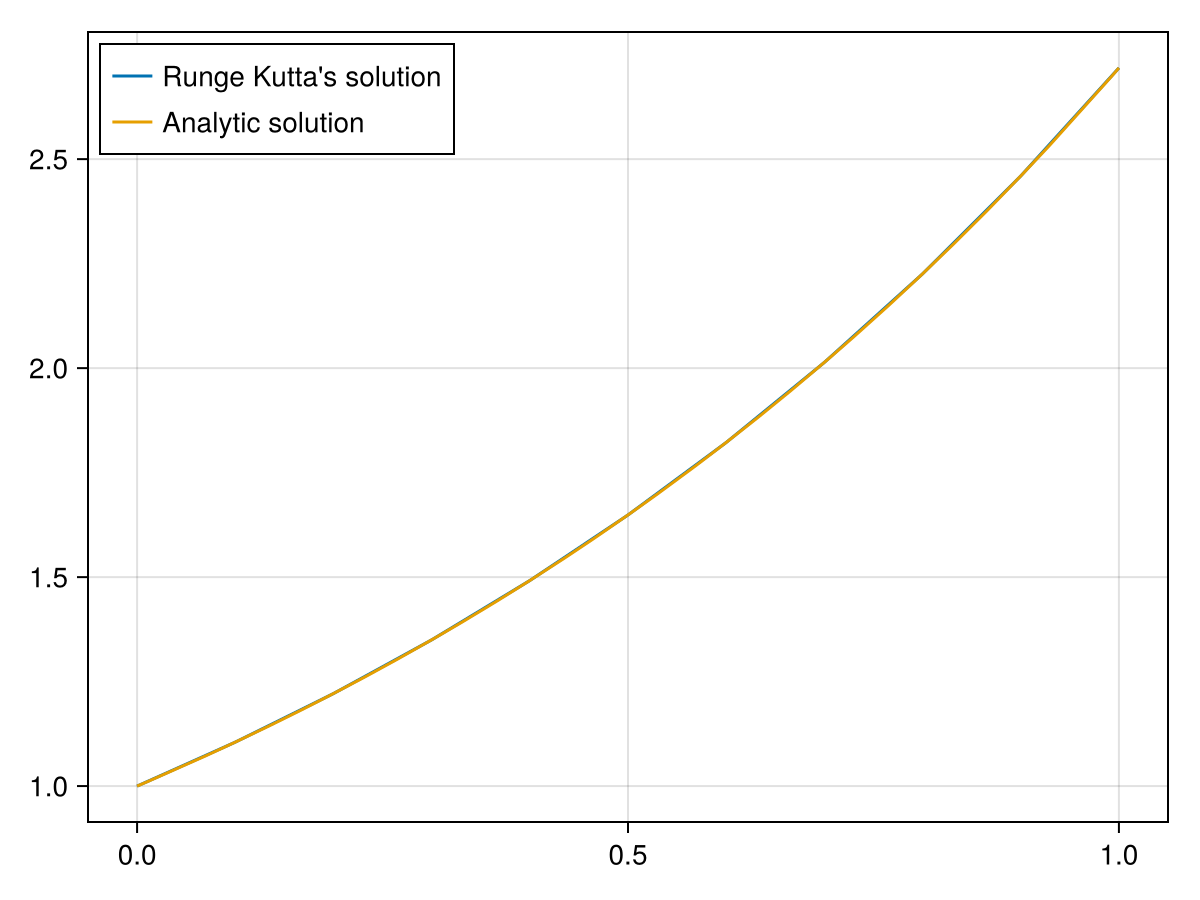

In [13]:
fig, ax = lines(t,y,label="Runge Kutta's solution")
lines!(ax, 0..1, exp,label="Analytic solution")
axislegend(ax, position = :lt)
fig

In [1]:
using DifferentialEquations

In [2]:
f(u,p,t) = u
u0 = 1.0
tspan = (0.0, 1.0)
prob = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

In [3]:
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Vector{Float64}:
 0.0
 0.10001999200479662
 0.34802032833535873
 0.683052570376323
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.105193012902056
 1.416261037790314
 1.9799122839671017
 2.718281708773355

In [4]:
sol[3]

1.416261037790314

In [5]:
sol(0.75)

2.1170003461681204

In [8]:
pts = [(t,sol(t)) for t=0:0.1:1]

11-element Vector{Tuple{Float64, Float64}}:
 (0.0, 1.0)
 (0.1, 1.1051709180988993)
 (0.2, 1.2214028012281672)
 (0.3, 1.3498587272674625)
 (0.4, 1.4918249699503803)
 (0.5, 1.648721181273569)
 (0.6, 1.8221180994290354)
 (0.7, 2.0137527117177667)
 (0.8, 2.2255411035915857)
 (0.9, 2.4596023119414028)
 (1.0, 2.718281708773351)

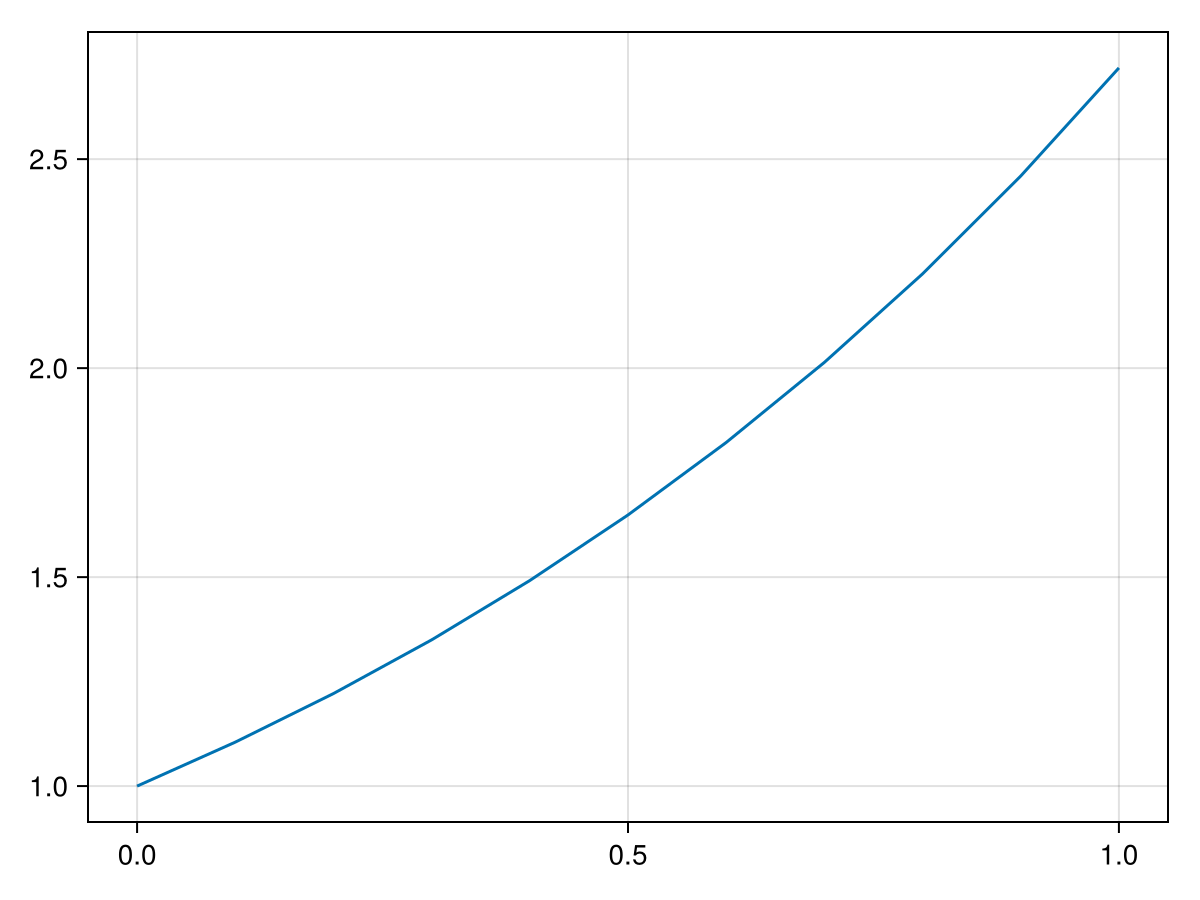

In [12]:
lines(pts)

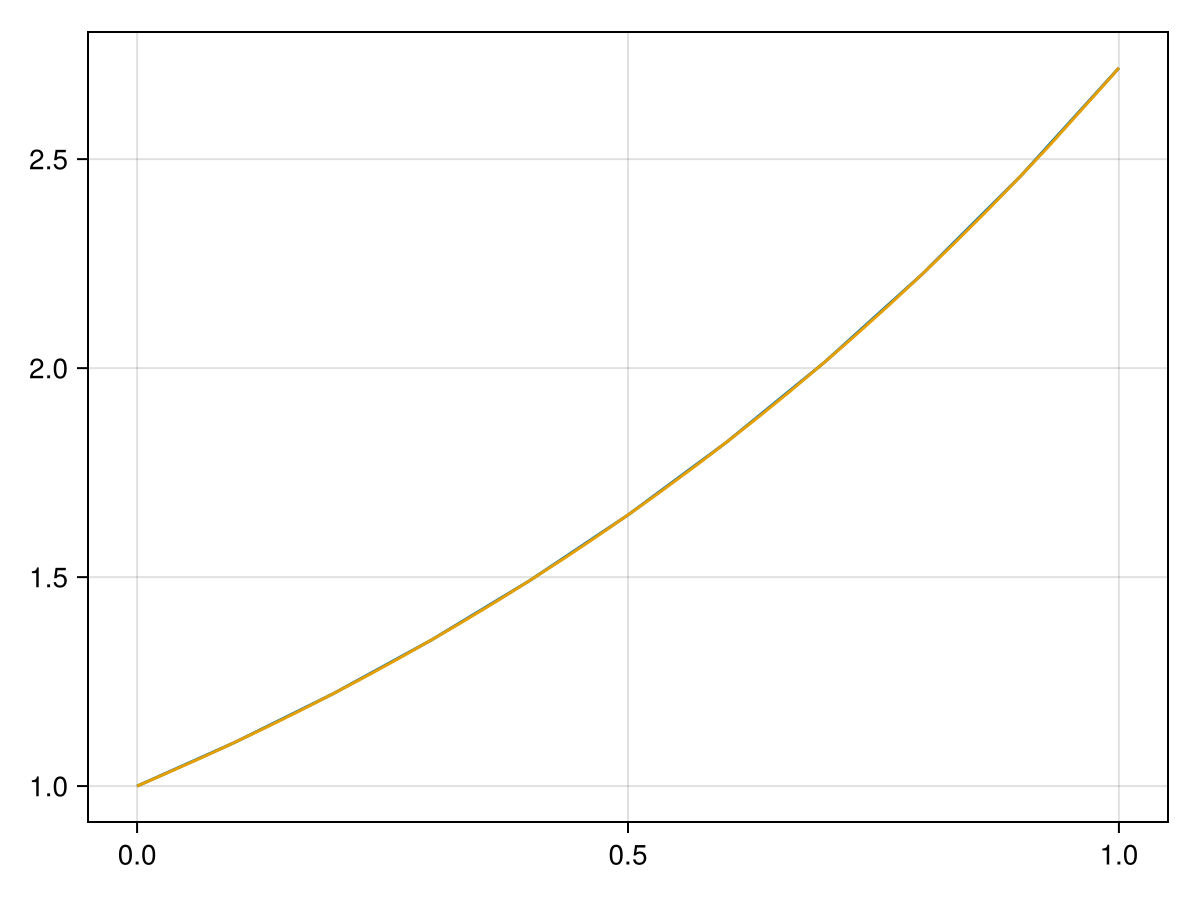

In [14]:
fig, ax = lines(pts)
lines!(0..1,exp)
fig

In [15]:
save("../assets/plots/diffeqn/DEexp.png", fig)

CairoMakie.Screen{IMAGE}


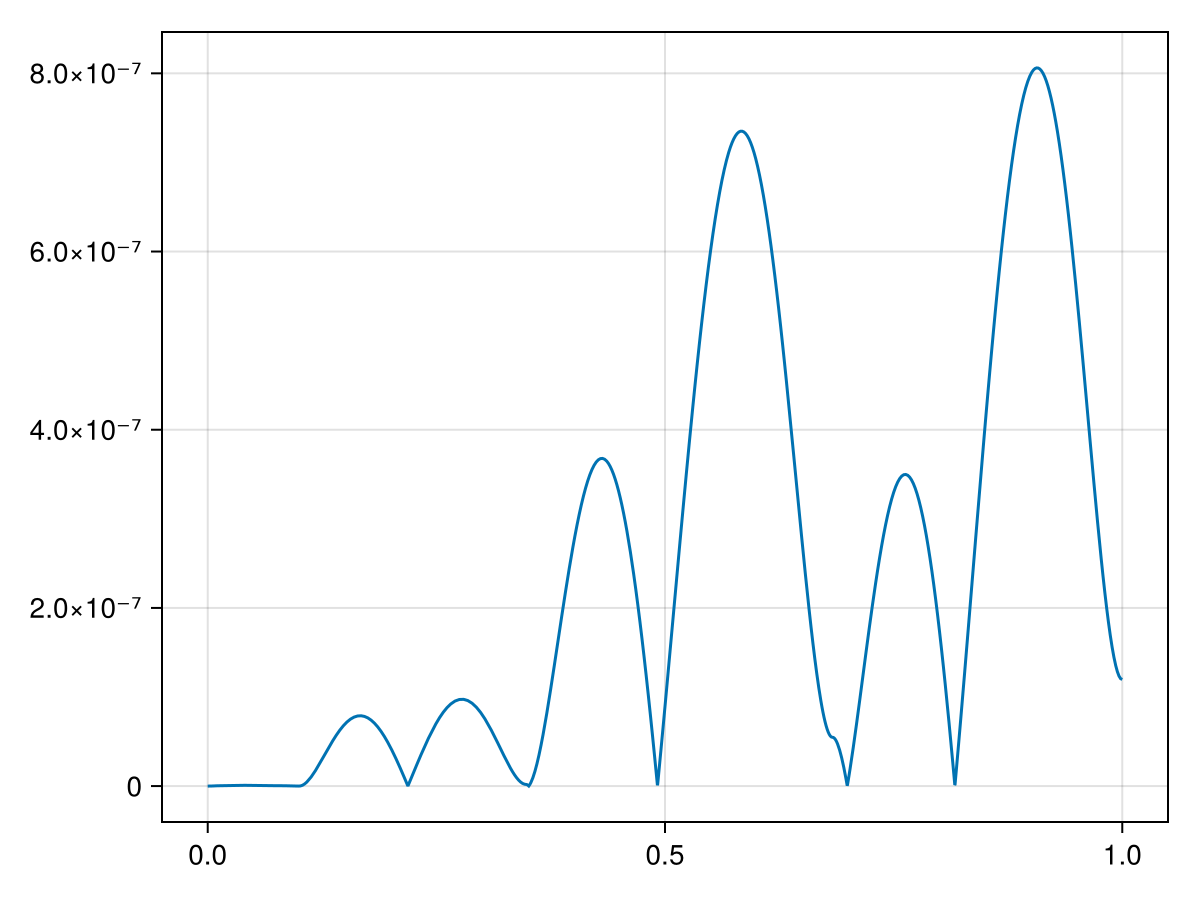

In [21]:
fig = lines(0..1, t -> abs(sol(t)-exp(t)))

In [22]:
save("../assets/plots/diffeqn/error.png", fig)

CairoMakie.Screen{IMAGE}


In [24]:
solve(prob, reltol = 1e-10)

retcode: Success
Interpolation: 3rd order Hermite
t: 6-element Vector{Float64}:
 0.0
 0.07196959537844554
 0.253035858476692
 0.4886876255576761
 0.7421717508621413
 1.0
u: 6-element Vector{Float64}:
 1.0
 1.074622670071499
 1.2879294591956056
 1.630175414948306
 2.1004923105954827
 2.7182818284999355

In [33]:
F(u,p,t) = [u[2]; u[1]]

F (generic function with 2 methods)

In [35]:
prob2 = ODEProblem(F, [1; 0], (0, 6pi))

ODEProblem with uType Vector{Int64} and tType Float64. In-place: true
timespan: (0.0, 18.84955592153876)
u0: 2-element Vector{Int64}:
 1
 0

In [36]:
@btime solsys = solve(prob2)

  15.916 μs (656 allocations: 30.20 KiB)


retcode: Success
Interpolation: 3rd order Hermite
t: 32-element Vector{Float64}:
  0.0
  0.0009990009990009992
  0.010989010989010992
  0.07985922144034886
  0.24038822405706806
  0.4812558574624112
  0.7872724669659539
  1.177055864105272
  1.6302666325445005
  2.1040020416655505
  ⋮
 12.346380830288073
 13.222619758256474
 14.019015426153658
 14.898462416103463
 15.712697847762819
 16.588239518302156
 17.420836635959226
 18.282507440862418
 18.84955592153876
u: 32-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999995009985435, -0.000999000832833342]
 [0.9999396214263468, -0.010988789821184267]
 [0.9968129466958345, -0.0797743648706733]
 [0.9712456189791355, -0.2380797057577801]
 [0.8864142830333348, -0.4628927575432361]
 [0.7057801376368034, -0.7084309013515797]
 [0.38364495119445885, -0.9234805879427074]
 [-0.05943651388382522, -0.9982319729980582]
 [-0.5082987088188182, -0.861180687719113]
 ⋮
 [0.9761610510838229, 0.2178732998401407]
 [0.7921770357251829, -0.610654039047882]
 [0

In [ ]:
function F!(du, u, p, t)
  du[1] = u[2]
  du[2] = -u[1]
end

F! (generic function with 1 method)

In [38]:
prob3 = ODEProblem(F!, [1; 0], (0, 6pi))

ODEProblem with uType Vector{Int64} and tType Float64. In-place: true
timespan: (0.0, 18.84955592153876)
u0: 2-element Vector{Int64}:
 1
 0

In [42]:
sol3 = solve(prob3)

retcode: Success
Interpolation: 3rd order Hermite
t: 32-element Vector{Float64}:
  0.0
  0.0009990009990009992
  0.010989010989010992
  0.07985922144034886
  0.24038822405706806
  0.4812558574624112
  0.7872724669659539
  1.177055864105272
  1.6302666325445005
  2.1040020416655505
  ⋮
 12.346380830288073
 13.222619758256474
 14.019015426153658
 14.898462416103463
 15.712697847762819
 16.588239518302156
 17.420836635959226
 18.282507440862418
 18.84955592153876
u: 32-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999995009985435, -0.000999000832833342]
 [0.9999396214263468, -0.010988789821184267]
 [0.9968129466958345, -0.0797743648706733]
 [0.9712456189791355, -0.2380797057577801]
 [0.8864142830333348, -0.4628927575432361]
 [0.7057801376368034, -0.7084309013515797]
 [0.38364495119445885, -0.9234805879427074]
 [-0.05943651388382522, -0.9982319729980582]
 [-0.5082987088188182, -0.861180687719113]
 ⋮
 [0.9761610510838229, 0.2178732998401407]
 [0.7921770357251829, -0.610654039047882]
 [0

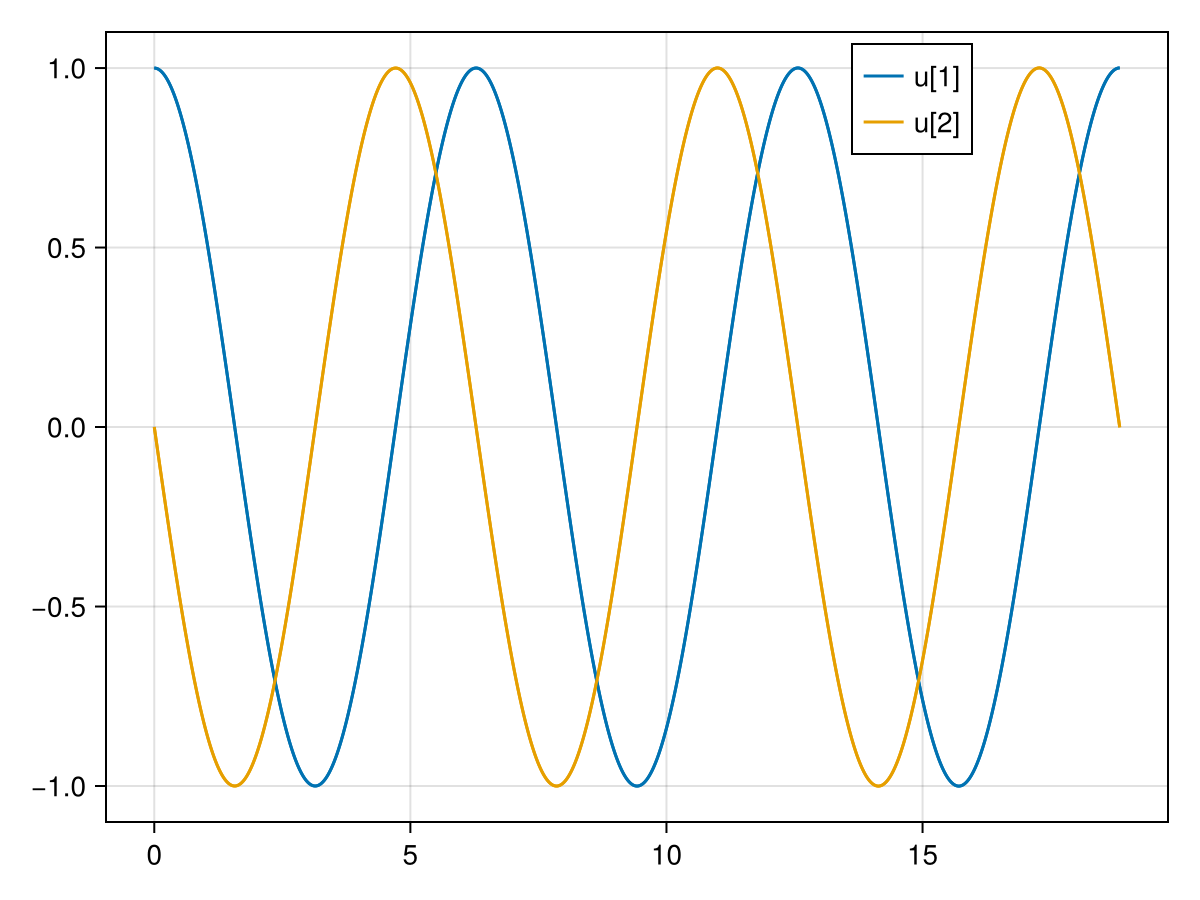

In [45]:
fig, ax = lines(sol3)
axislegend(ax, position=(0.8,1))
fig

In [46]:
save("../assets/plots/diffeqn/oscillator.png", fig)

CairoMakie.Screen{IMAGE}


In [57]:
y1 = map(t -> sol3(t)[1],0:0.1:6pi)
y2 = map(t -> sol3(t)[2],0:0.1:6pi)

189-element Vector{Float64}:
  0.0
 -0.0998334223224194
 -0.19866932849150437
 -0.2955203061122157
 -0.3894183578917346
 -0.4794255892023312
 -0.5646428885211298
 -0.6442177662723167
 -0.7173561629460294
 -0.7833282685755354
  ⋮
  0.7509029386482762
  0.681089680066953
  0.6044614108622302
  0.5218311001578875
  0.43401190566589315
  0.3418601043608569
  0.24629433514544863
  0.14826306657927266
  0.048744596878837636

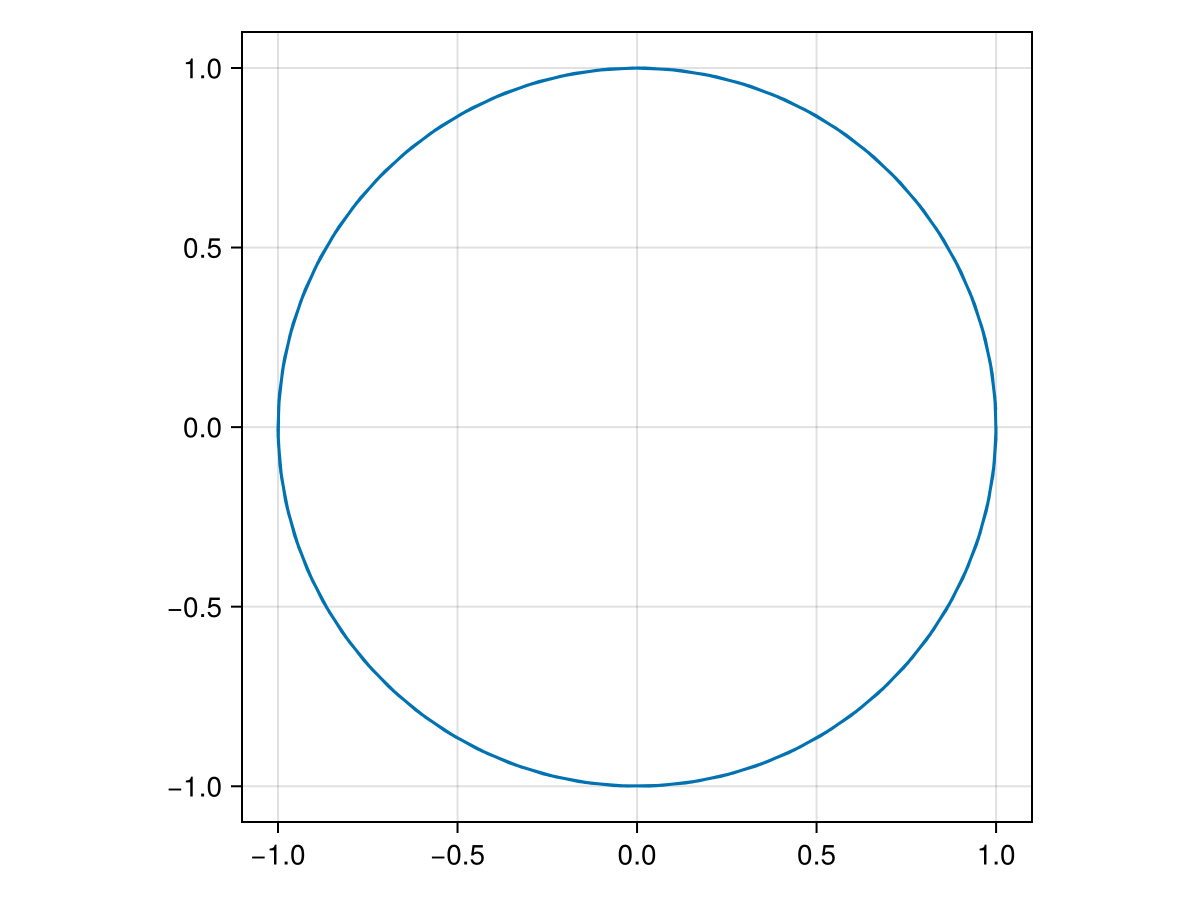

In [59]:
fig = lines(y1, y2, axis = (aspect = 1,))

In [61]:
save("../assets/plots/diffeqn/system01.png", fig)

CairoMakie.Screen{IMAGE}


In [28]:
function lorenz(u, p, t)
  dx = 10.0 * (u[2] - u[1])
  dy = u[1] * (28.0 - u[3]) - u[2]
  dz = u[1] * u[2] - (8 / 3) * u[3]
  [dx, dy, dz]
end

lorenz (generic function with 1 method)

In [29]:
using DifferentialEquations, BenchmarkTools
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz, u0, tspan)
@btime solve(prob, Tsit5());

  2.390 ms (192104 allocations: 7.44 MiB)


In [30]:
@btime solve(prob, Tsit5(), save_everystep = false);

  2.179 ms (169897 allocations: 6.49 MiB)


In [62]:
function lorenz!(du, u, p, t)
  du[1] = 10.0 * (u[2] - u[1])
  du[2] = u[1] * (28.0 - u[3]) - u[2]
  du[3] = u[1] * u[2] - (8 / 3) * u[3]
  nothing
end

lorenz! (generic function with 1 method)

In [65]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)
lorsol = solve(prob);

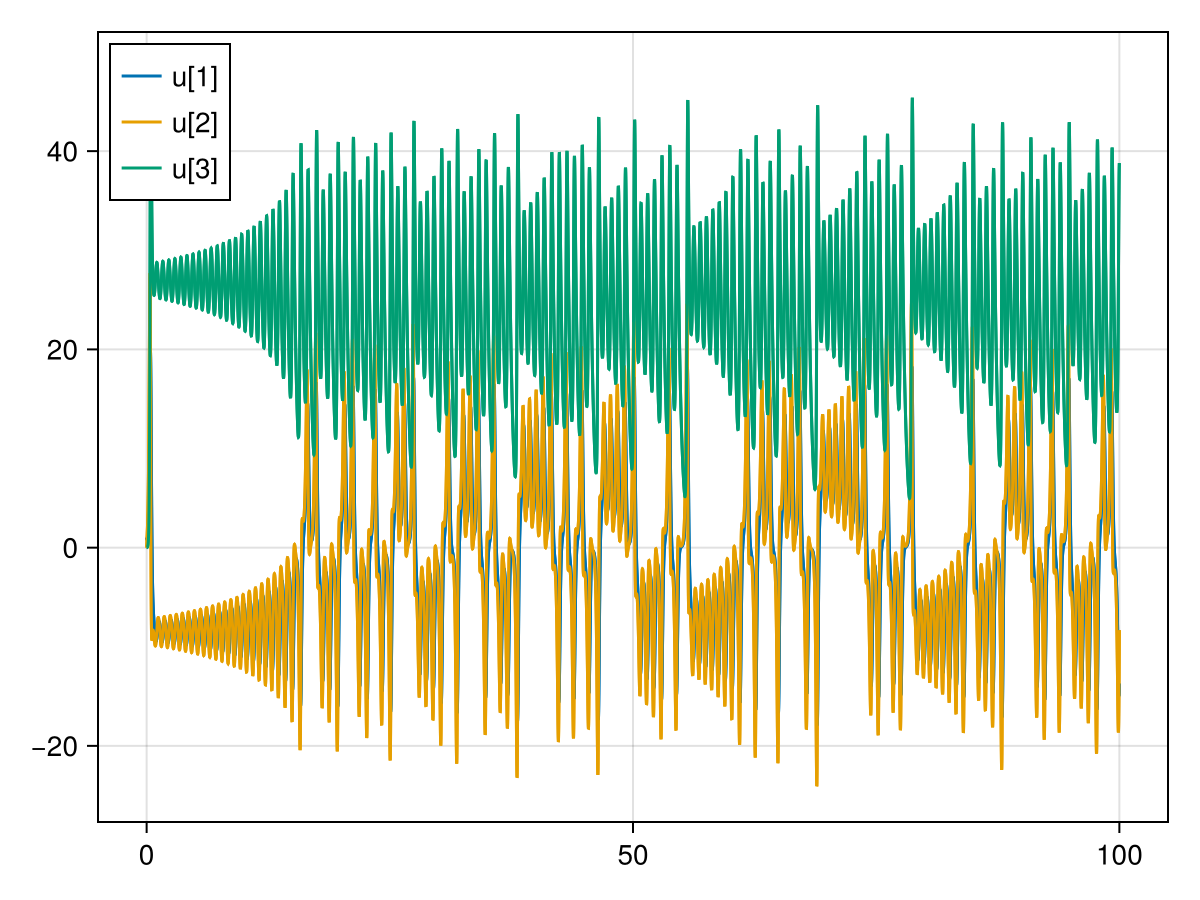

In [68]:
fig, ax = lines(lorsol)
axislegend(ax, position = :lt)
fig